This is my First machine learning model. I have chosen this data set "Salary_dataset" because it has the least number of features and it is easy to implement my first ML model using Linear Regression.

I will be using only numpy library to create this model and mat plot library to have a visual representation of the model at various stages

In [945]:
import numpy as np
import matplotlib.pyplot as plt


In [946]:
file_path="C:/AAKASH/MS NOTES/kaggle/salary dataset-simple linear regression/Salary_dataset.csv"
raw_data=np.genfromtxt(file_path,delimiter=',',skip_header=1)
print("raw data :"+str(raw_data[:5]))
data=np.delete(raw_data,0,axis=1)
print("processed data:"+str(data[:5]))



raw data :[[0.0000e+00 1.2000e+00 3.9344e+04]
 [1.0000e+00 1.4000e+00 4.6206e+04]
 [2.0000e+00 1.6000e+00 3.7732e+04]
 [3.0000e+00 2.1000e+00 4.3526e+04]
 [4.0000e+00 2.3000e+00 3.9892e+04]]
processed data:[[1.2000e+00 3.9344e+04]
 [1.4000e+00 4.6206e+04]
 [1.6000e+00 3.7732e+04]
 [2.1000e+00 4.3526e+04]
 [2.3000e+00 3.9892e+04]]


Creating data points matrix and label matrix

In [947]:
X=data[:,:-1]
Y=data[:,-1]
Y=Y.reshape(-1,1)
print(X[:5])
print(Y[:5])
print(X.shape)
print(Y.shape)

[[1.2]
 [1.4]
 [1.6]
 [2.1]
 [2.3]]
[[39344.]
 [46206.]
 [37732.]
 [43526.]
 [39892.]]
(30, 1)
(30, 1)


Visualisation of the complete data

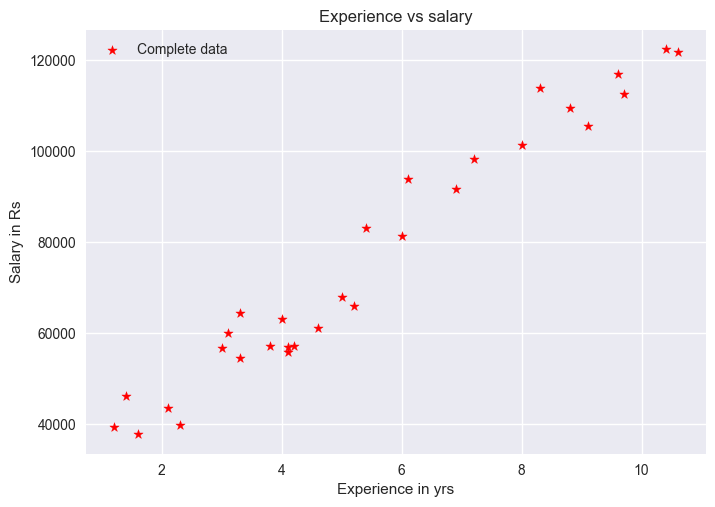

In [948]:
plt.scatter(X, Y, marker='*', c='r',label='Complete data') 
plt.xlabel('Experience in yrs')
plt.ylabel('Salary in Rs')
plt.title('Experience vs salary')

plt.legend()
plt.show()

Splitting the data into train and test data 

In [949]:
test_size=0.20
split_index=int((1-test_size)*X.shape[0])
X_train=X[:split_index]
X_test=X[split_index:]
Y_train=Y[:split_index]
Y_test=Y[split_index:]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(24, 1)
(24, 1)
(6, 1)
(6, 1)


Visualisation of the data after splitting

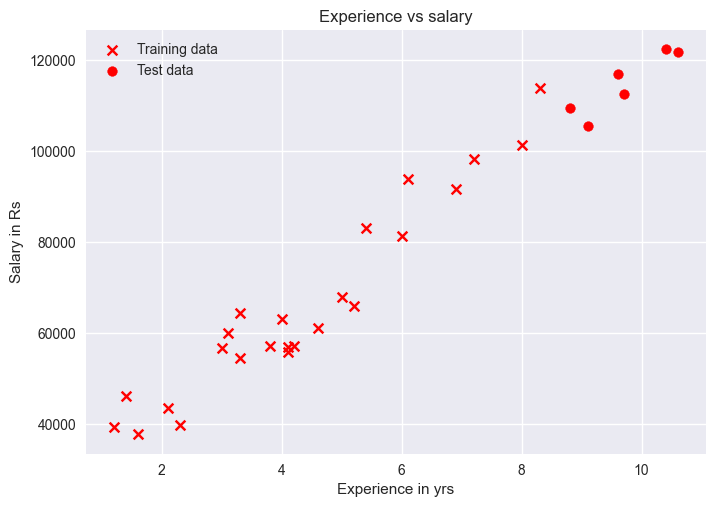

In [950]:
plt.scatter(X_train, Y_train, marker='x', c='r',label='Training data') 
plt.scatter(X_test, Y_test, marker='o', c='r',label='Test data') 

plt.xlabel('Experience in yrs')
plt.ylabel('Salary in Rs')
plt.title('Experience vs salary')

plt.legend()
plt.show()


Creating a function to compute the cost funtion(mse)

In [951]:
def compute_cost(X,Y,w,b):
    
    total_cost=0
    m=X.shape[0]
    pred=w*X+b
    se=(pred-Y)**2
    total_cost=1/m*(np.sum(se,axis=0))
    
    return total_cost

Creating a function to compute the Gradient values(derivatives)

In [952]:
def compute_gradient(X,Y,w,b):
    m = X.shape[0]
    dw=0
    db=0
    pred=w*X+b
    dw=1/m*np.sum((pred-Y)*X)
    db=1/m*np.sum(pred-Y)

    return dw,db

Creating a function to compute the Gradient descent

creating 3 lists to store values of cost , w and b after each iteration and printing the values for every 250th iteration

In [953]:
def gradient_descent(X, Y, w_0, b_0, cost, gradient, alpha, iterations):
    J_array=[]
    w=w_0
    b=b_0
    w_it=[]
    b_it=[]
    
    for i in range(iterations):
        dw,db=gradient(X,Y,w,b)
        w=w-(alpha*dw)
        w_it.append(w)
        b=b-(alpha*db)
        b_it.append(b)
        total_cost=cost(X,Y,w,b)
        J_array.append(total_cost)
        if i%250==0:
            print("iteration" + str(i) + "  : cost" + str(J_array[i])+"   :w"+str(w_it[i])+"    :b"+str(b_it[i]))



    return w,b,J_array,w_it,b_it,count

Initialising the parameters (w and b) and hyperparameters (alpha and iterations) and printing values of every 250th iterations

In [954]:
w_0=0
b_0=0
alpha=0.01
iterations=2500
w,b,J_array,w_it,b_it,count=gradient_descent(X_train, Y_train, w_0, b_0, compute_cost,compute_gradient, alpha, iterations)

print("final w:"+str(w))
print("final b:"+str(b))
print("final cost" +str(J_array[iterations-1]))



iteration0  : cost[2.86047012e+09]   :w3269.2140416666666    :b663.0141666666666
iteration250  : cost[64933878.4978985]   :w12593.195316542644    :b9448.770112304139
iteration500  : cost[48184046.98334043]   :w11734.562783401347    :b13912.534579014698
iteration750  : cost[40843308.95118839]   :w11166.139340096504    :b16867.591917672384
iteration1000  : cost[37626176.00212872]   :w10789.837256926588    :b18823.869839564984
iteration1250  : cost[36216243.59933853]   :w10540.72146223886    :b20118.945660131925
iteration1500  : cost[35598330.2547816]   :w10375.804280170338    :b20976.298985161793
iteration1750  : cost[35327525.14339761]   :w10266.627433413132    :b21543.87557972594
iteration2000  : cost[35208842.7925507]   :w10194.351253828067    :b21919.617040442652
iteration2250  : cost[35156829.37105151]   :w10146.503690076486    :b22168.361697381748
final w:10114.930565064993
final b:22332.500590434993
final cost[35134092.88433076]


Ploting the linear line ie the best fit curve for the training data

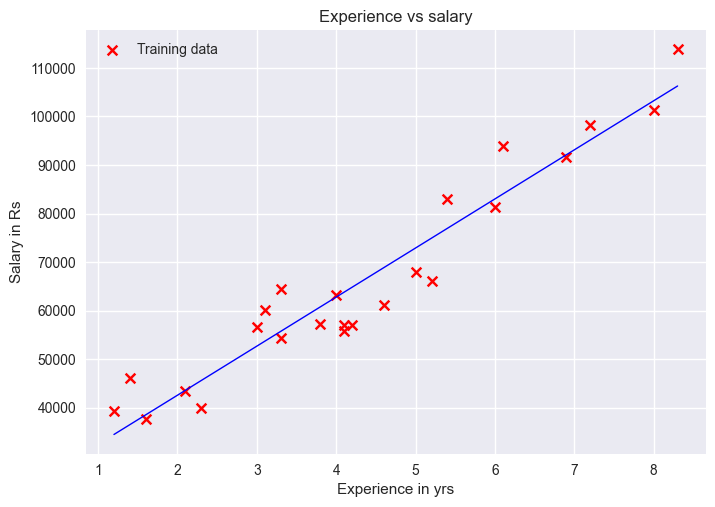

In [955]:

    predicted=w*X_train+b
    
    plt.plot(X_train, predicted, c ='b',linewidth=1)
    plt.scatter(X_train, Y_train, marker='x', c='r',label='Training data') 

    plt.xlabel('Experience in yrs')
    plt.ylabel('Salary in Rs')
    plt.title('Experience vs salary')

    
    plt.legend()
    plt.show()


plotting the line for every 250th iteration to visualise the updation of parameters(w and b)

w_it3269.2140416666666
b_it663.0141666666666


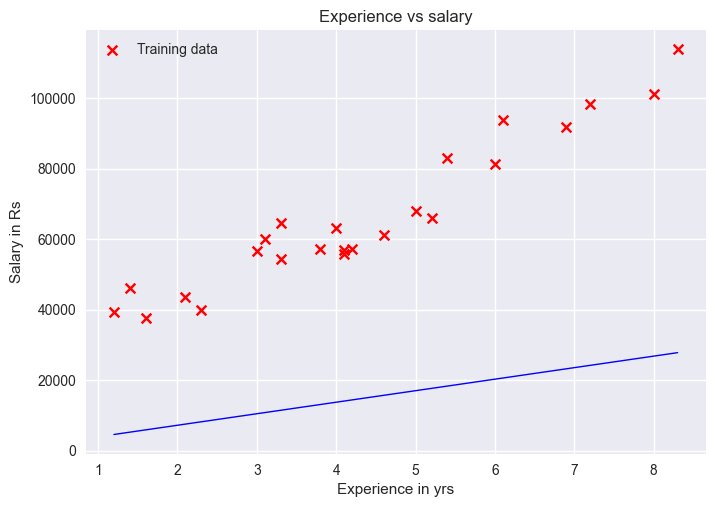

w_it12593.195316542644
b_it9448.770112304139


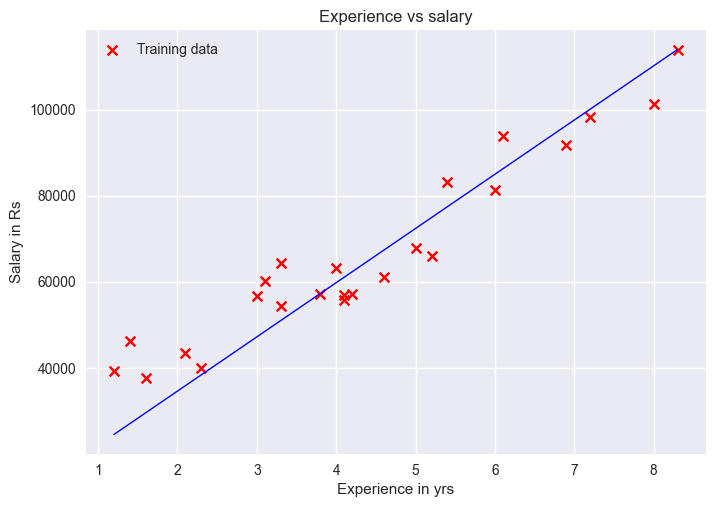

w_it11734.562783401347
b_it13912.534579014698


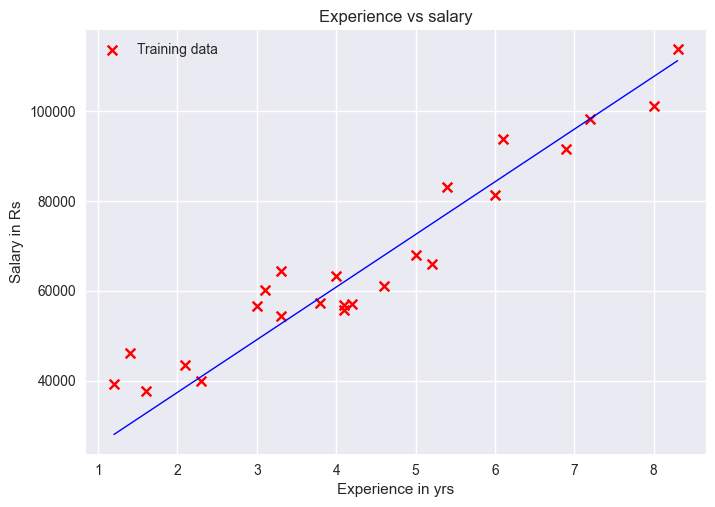

w_it11166.139340096504
b_it16867.591917672384


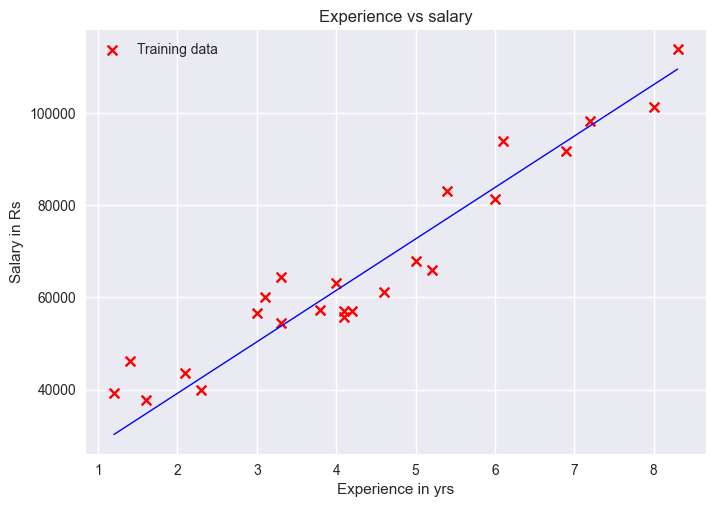

w_it10789.837256926588
b_it18823.869839564984


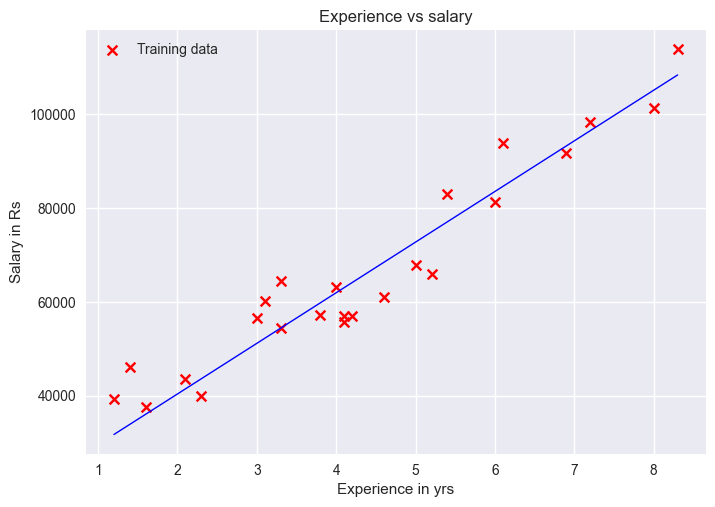

w_it10540.72146223886
b_it20118.945660131925


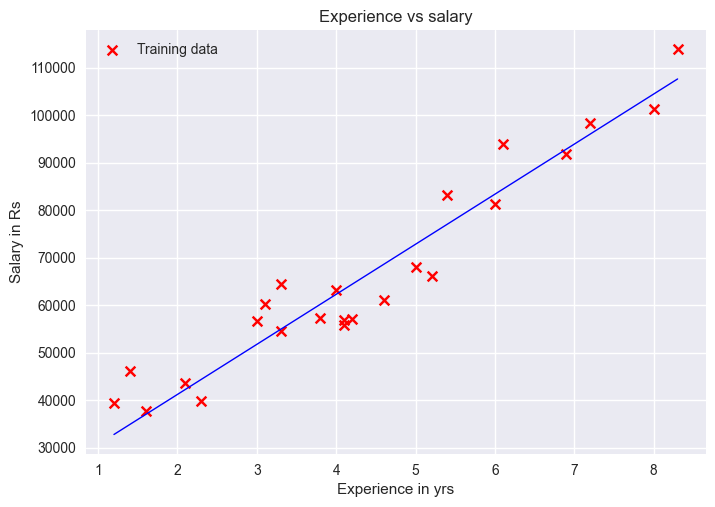

w_it10375.804280170338
b_it20976.298985161793


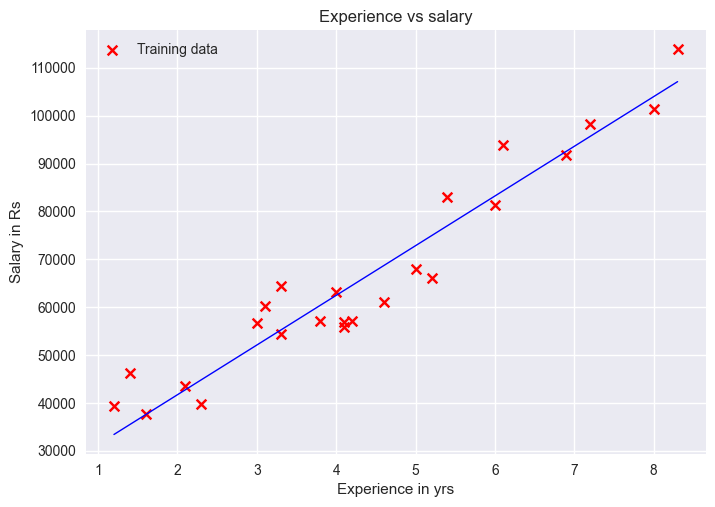

w_it10266.627433413132
b_it21543.87557972594


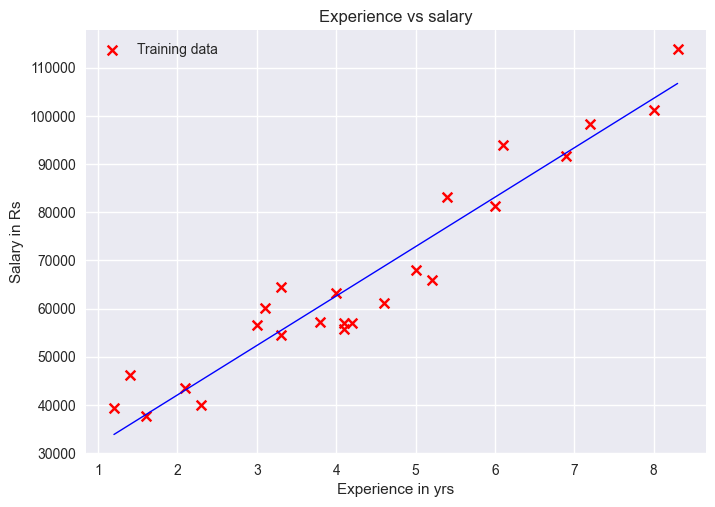

w_it10194.351253828067
b_it21919.617040442652


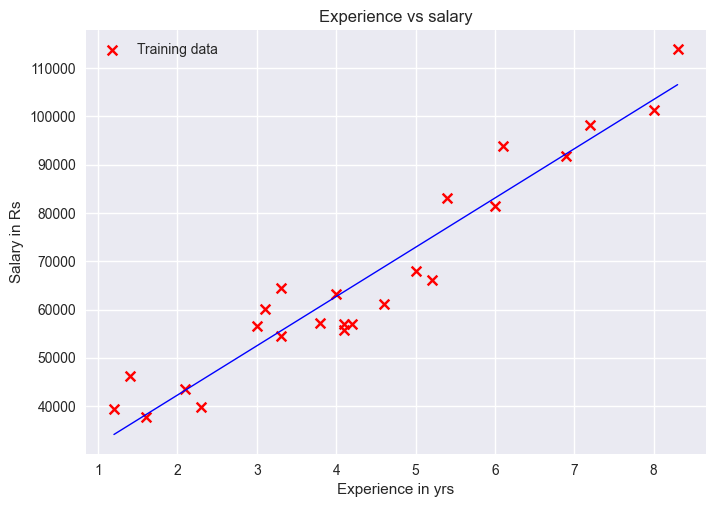

w_it10146.503690076486
b_it22168.361697381748


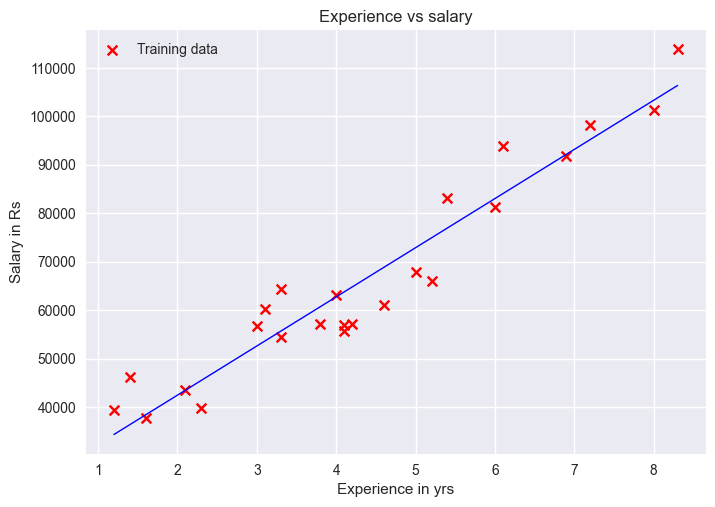

In [956]:
for i in range(0,iterations,250):
    predicted=w_it[i]*X_train+b_it[i]
    print("w_it"+ str(w_it[i]))
    print("b_it"+ str(b_it[i]))
    plt.plot(X_train, predicted, c ='b',linewidth=1)
    plt.scatter(X_train, Y_train, marker='x', c='r',label='Training data') 

    plt.xlabel('Experience in yrs')
    plt.ylabel('Salary in Rs')
    plt.title('Experience vs salary')
    
    plt.legend()
    plt.show()

Plotting the line for both the training and test data 

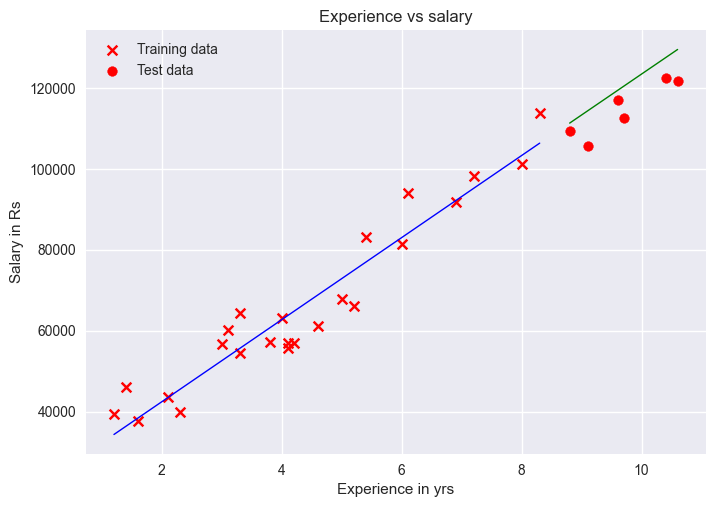

In [957]:
predicted_test=w*X_test+b
plt.plot(X_train, predicted, c ='b',linewidth=1)
plt.plot(X_test, predicted_test, c ='g',linewidth=1)
plt.scatter(X_train, Y_train, marker='x', c='r',label='Training data') 
plt.scatter(X_test, Y_test, marker='o', c='r',label='Test data') 

plt.xlabel('Experience in yrs')
plt.ylabel('Salary in Rs')
plt.title('Experience vs salary')


plt.legend()
plt.show()

printing the Numerical results for the test data ie showing the Accuracy of the predicted values and the target values

In [959]:
A=100-((predicted_test-Y_test)/Y_test*100)
for i in range(split_index,X.shape[0],1):
    print("Y_test:"+str(Y_test[i-split_index])+"   ,predicted:"+str(predicted_test[i-split_index])+"   ,Accuracy:"+str(A[i-split_index]))

Y_test:[109432.]   ,predicted:[111343.88956301]   ,Accuracy:[98.25289718]
Y_test:[105583.]   ,predicted:[114378.36873253]   ,Accuracy:[91.66971129]
Y_test:[116970.]   ,predicted:[119435.83401506]   ,Accuracy:[97.89190902]
Y_test:[112636.]   ,predicted:[120447.32707157]   ,Accuracy:[93.06498183]
Y_test:[122392.]   ,predicted:[127527.77846711]   ,Accuracy:[95.8038283]
Y_test:[121873.]   ,predicted:[129550.76458012]   ,Accuracy:[93.70019235]
